<a href="https://colab.research.google.com/github/Jasn001/COMP_215/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 1  
----------------
#### Name(s): Jasnpreet Singh
#### Date: 04/08/2025

##Introduction:
This notebook simulates the spread of an infectious disease using a Cellular Automata model.
Each cell in the grid represents an individual who can be susceptible, infected, or recovered.
By running this simulation, we explore how infection probability and recovery time affect the outbreak.

##Imporing Libraries:
First, I import the necessary Python libraries to build and visualize my simulation. I use numpy for matrix operations, matplotlib for plotting, and random for stochastic behaviors.

In [25]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import random
import time

##Parameters:
These are the parameters that control the simulation. Then I'll define grid size, infection probability, recovery time, and the number of initially infected people. Adjusting these values allows me to test different outbreak scenarios.

In [26]:
grid_size = 50
p_infect = 0.3
recovery_time = 10
initial_infected = 5
num_steps = 50
delay = 0.5

# States: 0 = Susceptible, 1 = Infected, 2 = Recovered
S, I, R = 0, 1, 2

##Initialize Grid:
I start by initializing a grid where each cell is initially susceptible. Then, I randomly infect a few individuals to kickstart the simulation.

In [27]:
grid = np.full((grid_size, grid_size), S)  # All susceptible
infection_timer = np.zeros((grid_size, grid_size))  # Track infection duration

# Infect a few individuals to start
for _ in range(initial_infected):
    x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
    grid[x, y] = I
    infection_timer[x, y] = 1

##Simulation Functions
These functions manage how the simulation progresses. I define how each
cell interacts with its neighbors and how states update from infected to recovered.

In [28]:
def get_neighbors(x, y):
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid_size and 0 <= ny < grid_size:
                neighbors.append((nx, ny))
    return neighbors

def step(grid, infection_timer):
    new_grid = grid.copy()
    new_timer = infection_timer.copy()

    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == I:
                # Try to infect neighbors
                for nx, ny in get_neighbors(x, y):
                    if grid[nx, ny] == S and random.random() < p_infect:
                        new_grid[nx, ny] = I
                        new_timer[nx, ny] = 1
                # Update timer and possibly recover
                new_timer[x, y] += 1
                if new_timer[x, y] >= recovery_time:
                    new_grid[x, y] = R
    return new_grid, new_timer

def visualize(grid, t):
    plt.figure(figsize=(6, 6))
    cmap = plt.cm.get_cmap('viridis', 3)
    plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
    plt.title(f"Month {t}", fontsize=16)
    plt.colorbar(ticks=[0, 1, 2], label='State (0=S, 1=I, 2=R)')
    plt.axis('off')
    plt.show()
    time.sleep(delay)

##Simulation Loop
This is where I simulate a set number of time steps. At each step, I record how many individuals are susceptible, infected, or recovered. I also visualize the grid every few steps to show the progression of the disease.

<ipython-input-28-a024da9da5d8>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


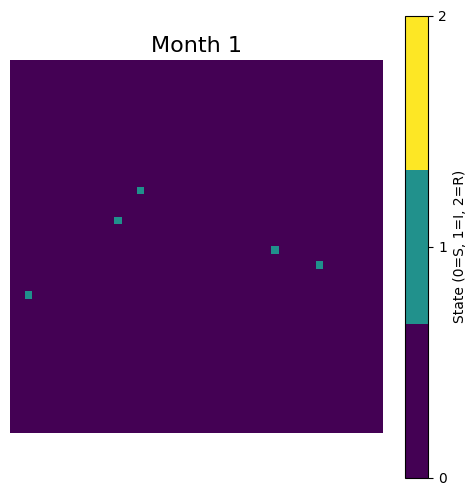

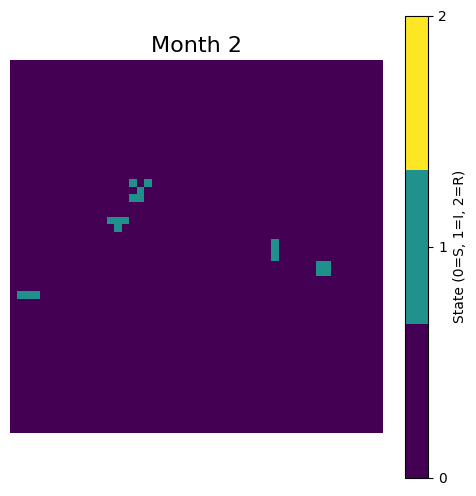

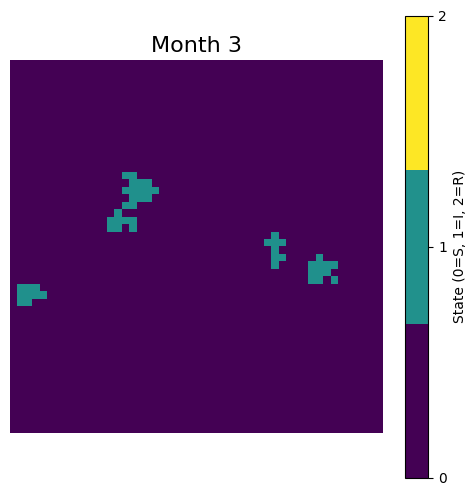

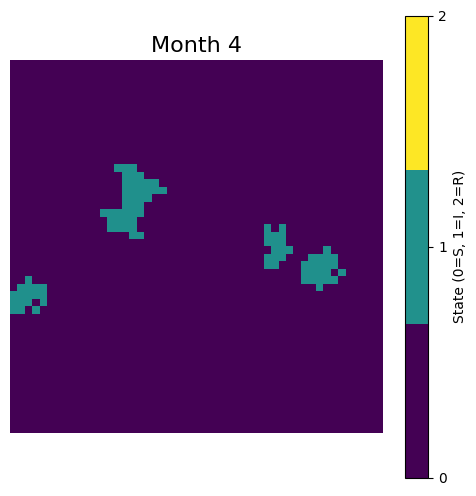

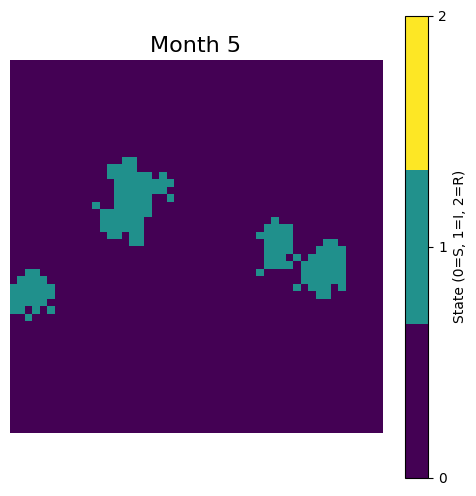

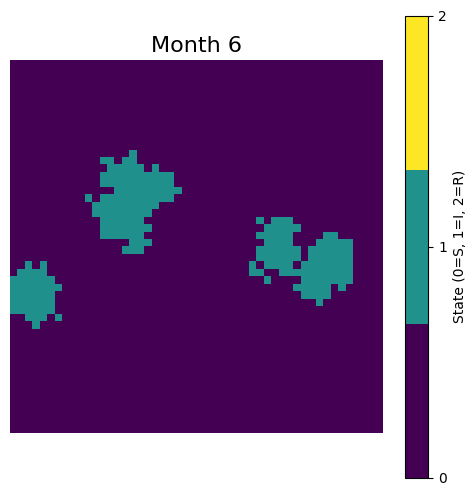

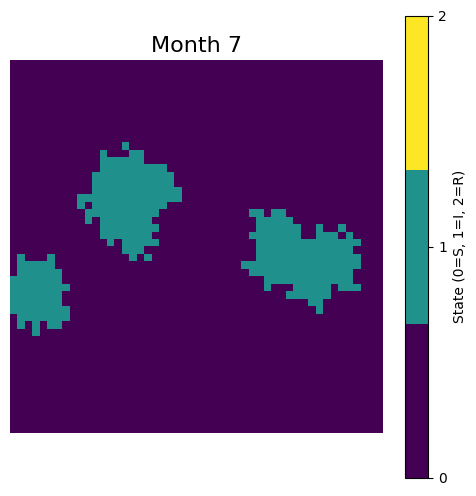

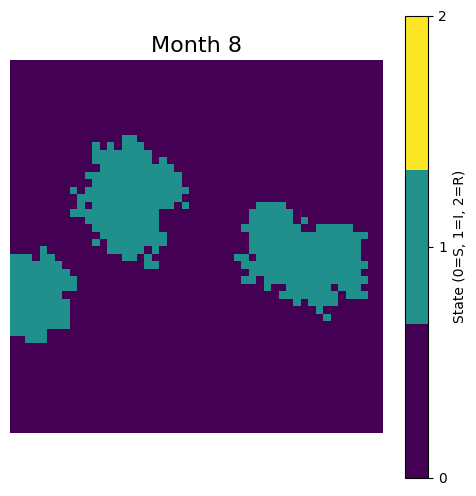

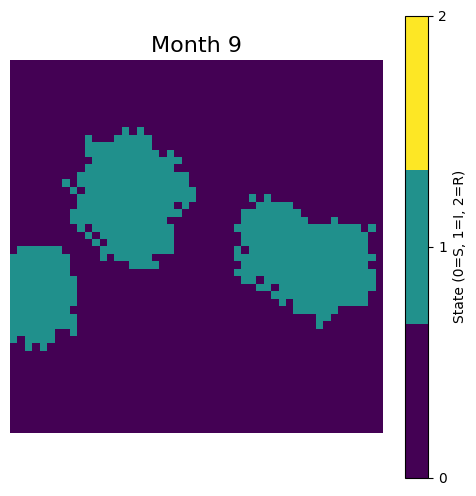

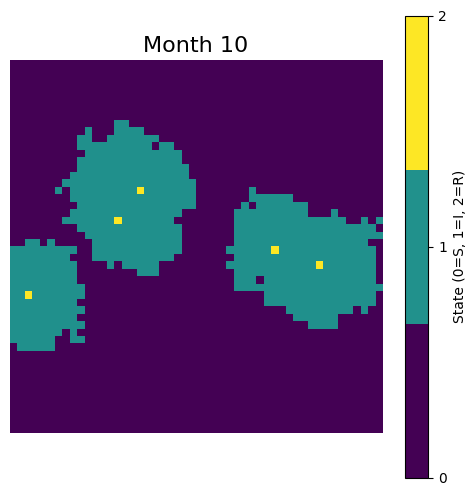

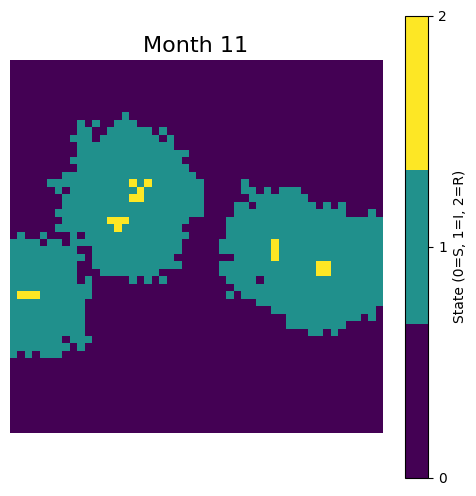

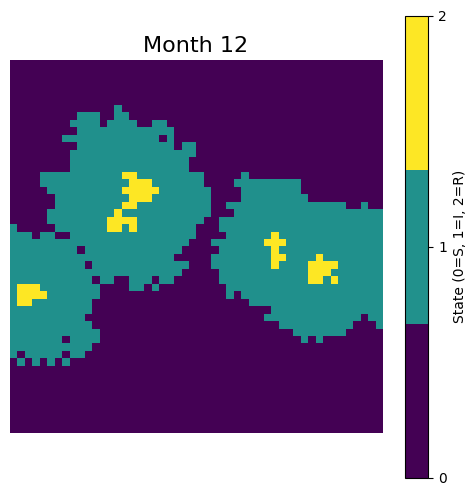

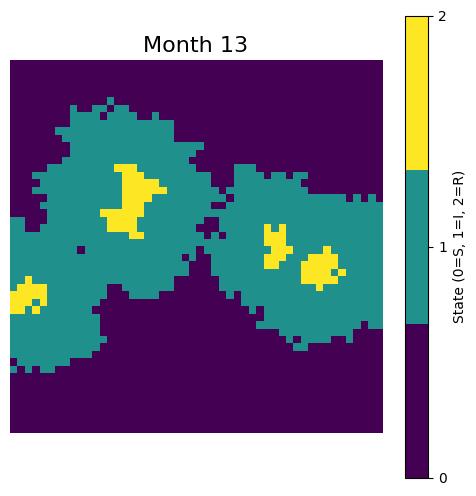

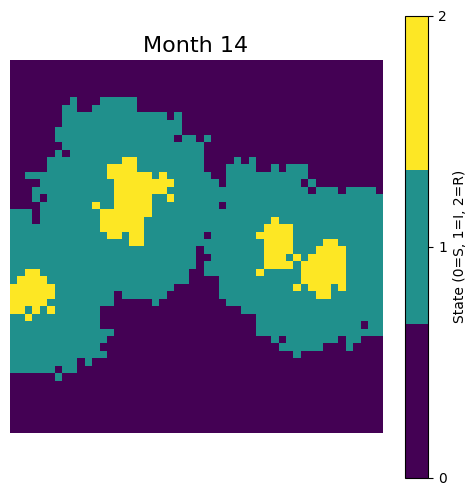

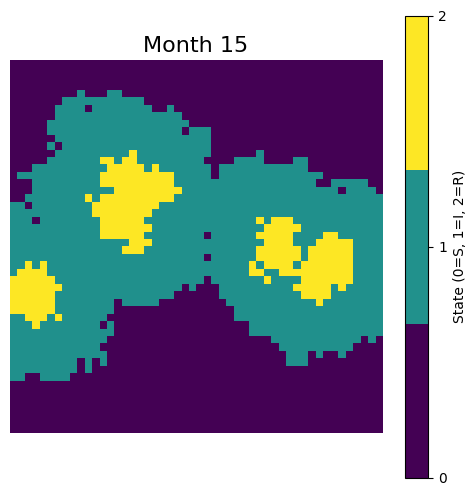

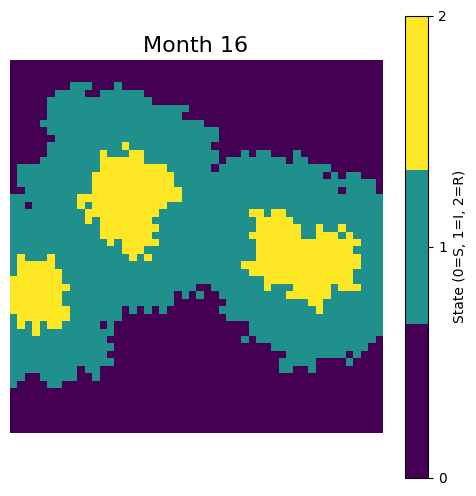

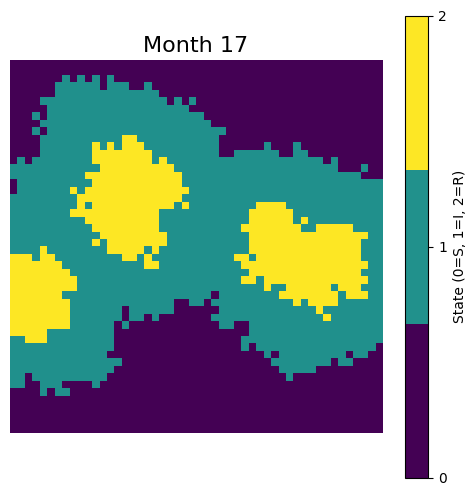

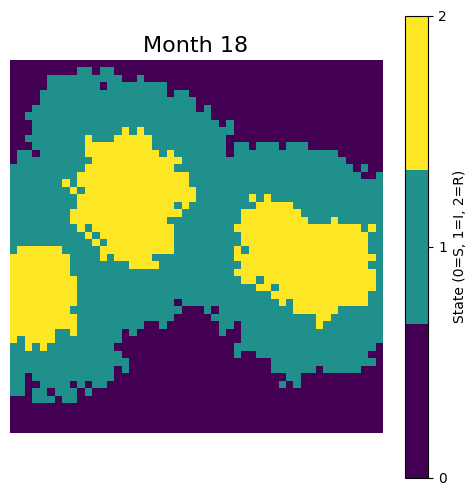

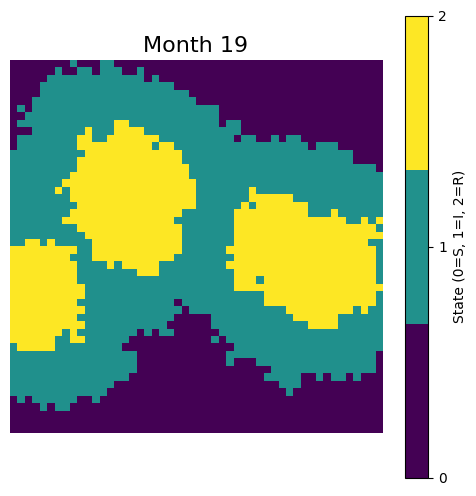

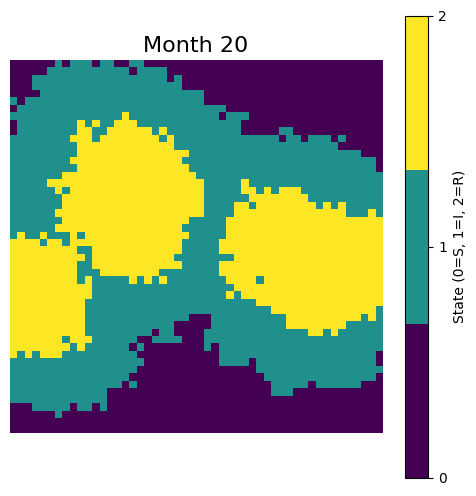

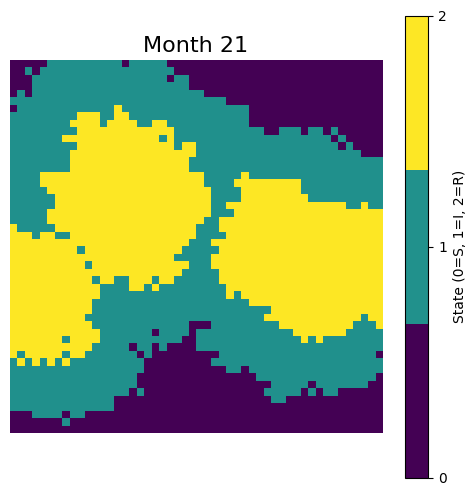

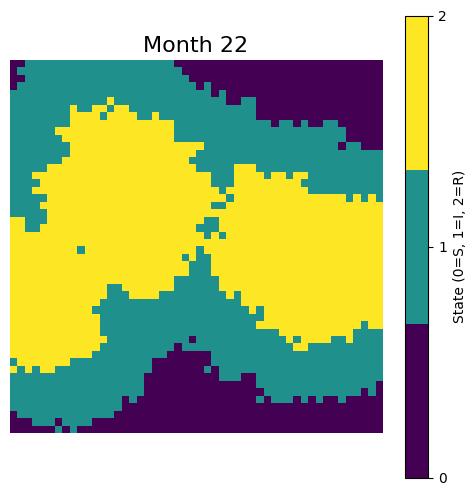

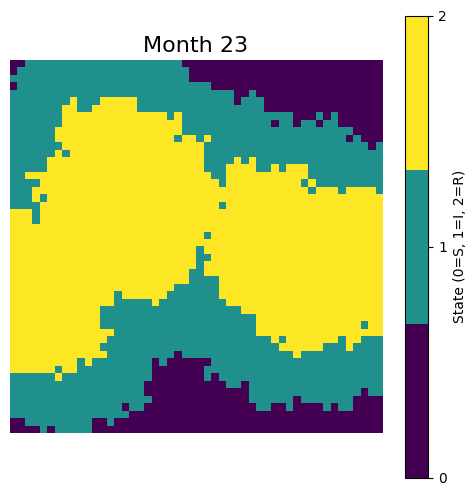

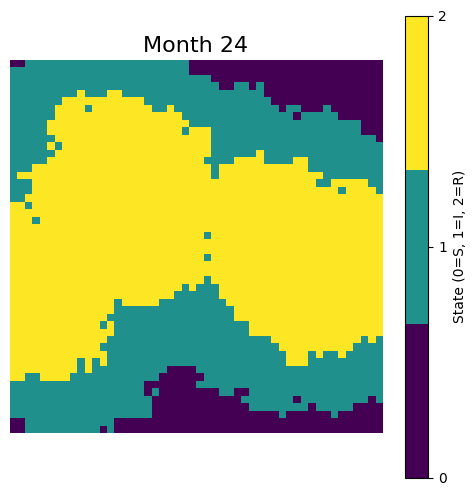

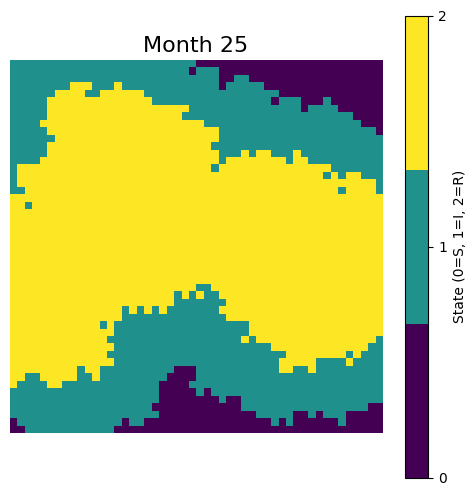

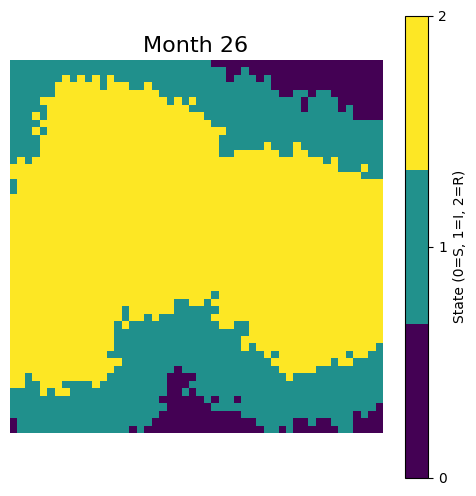

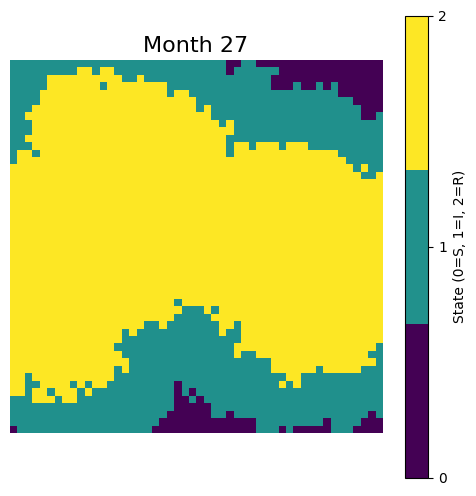

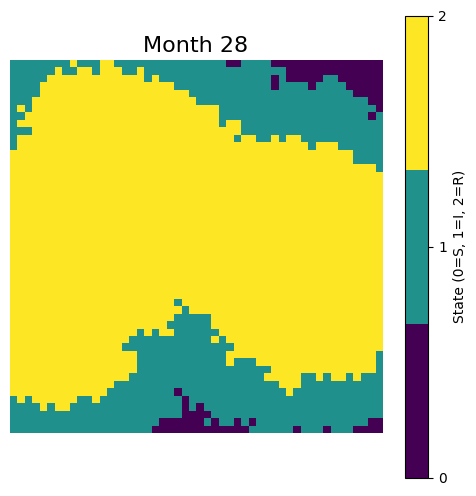

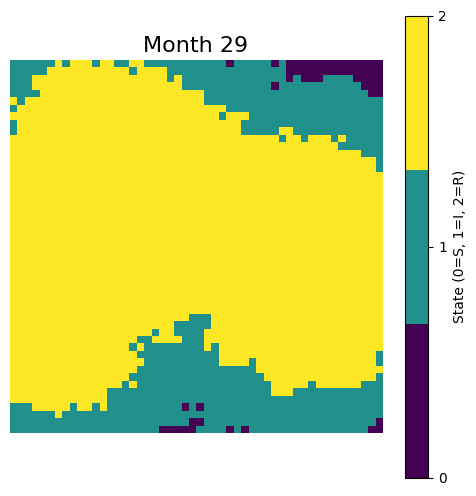

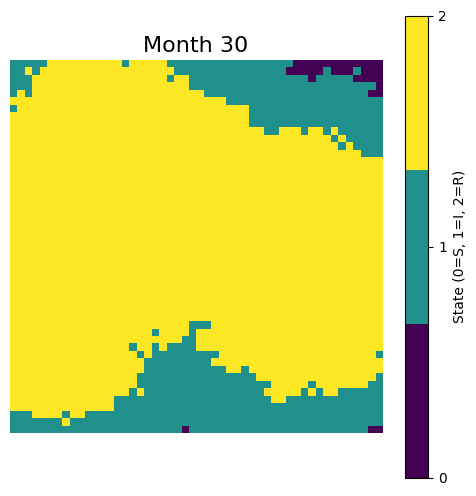

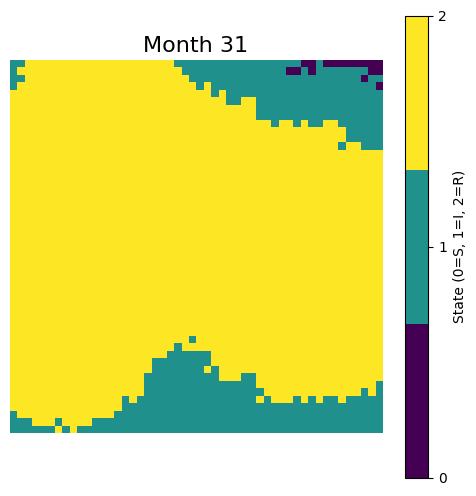

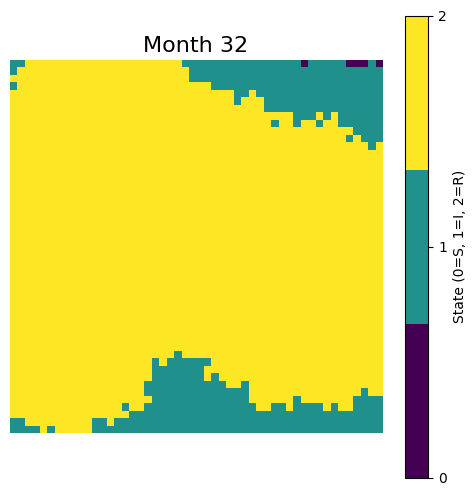

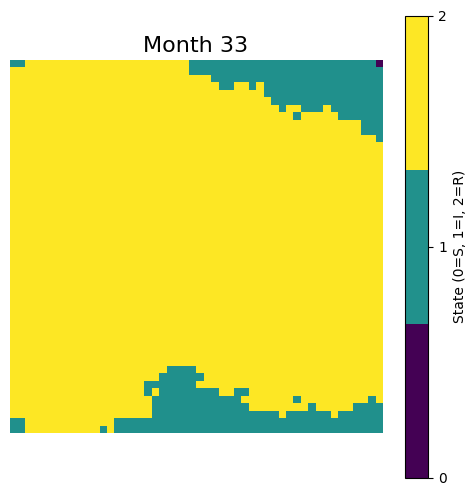

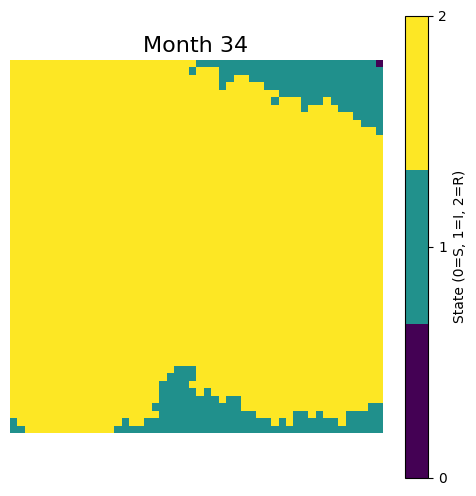

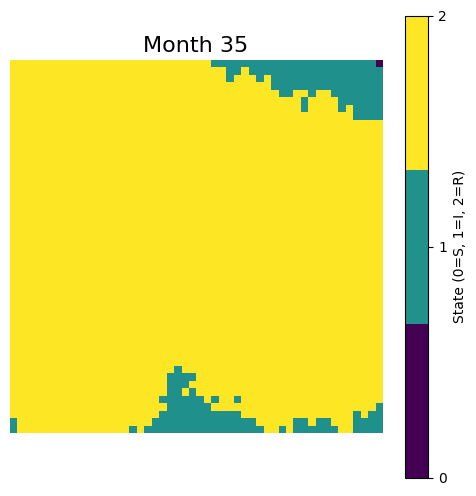

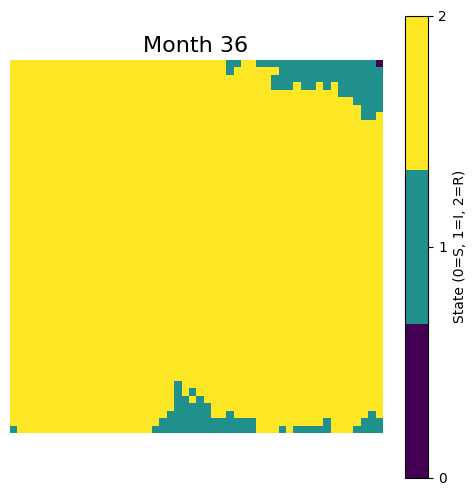

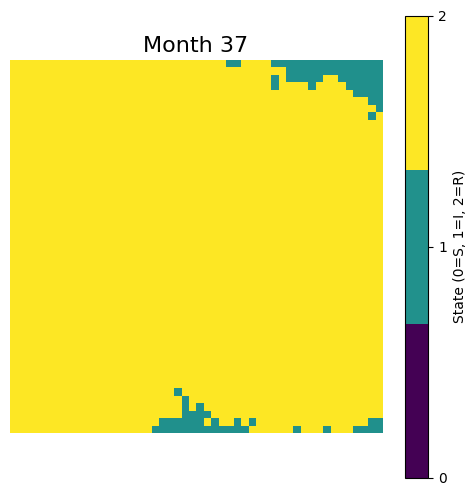

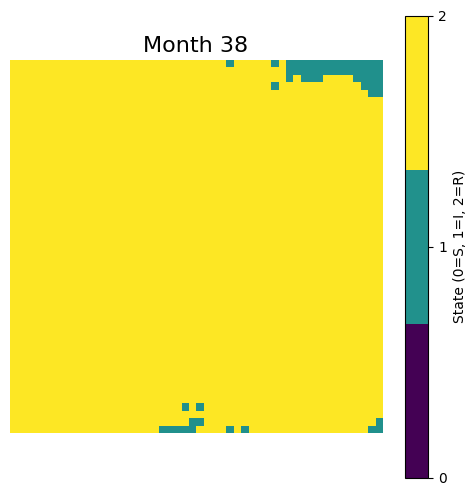

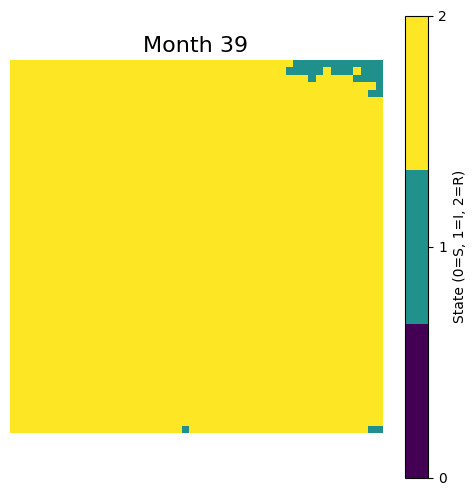

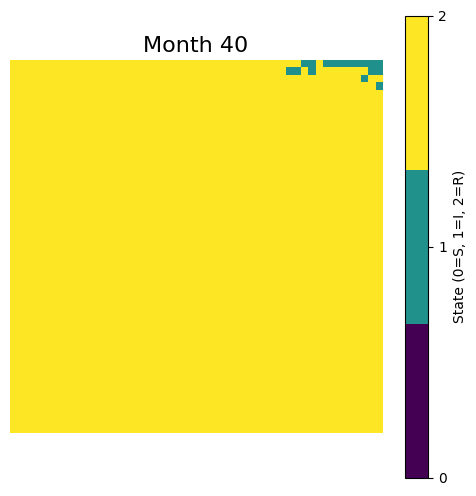

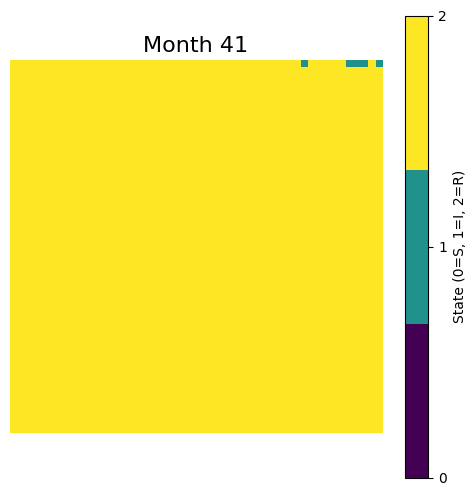

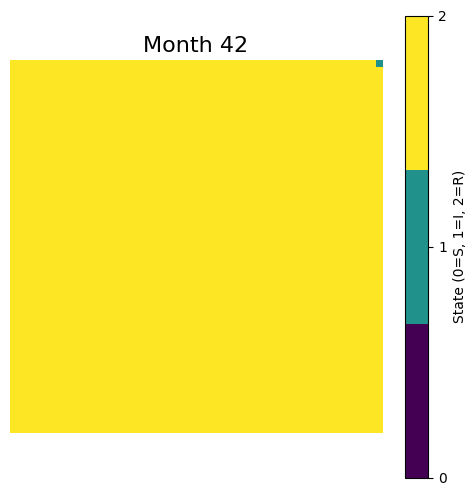

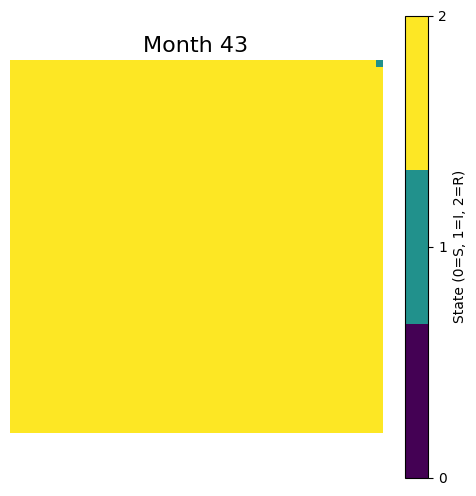

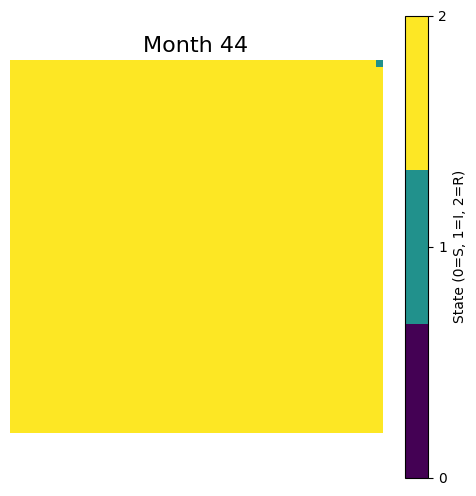

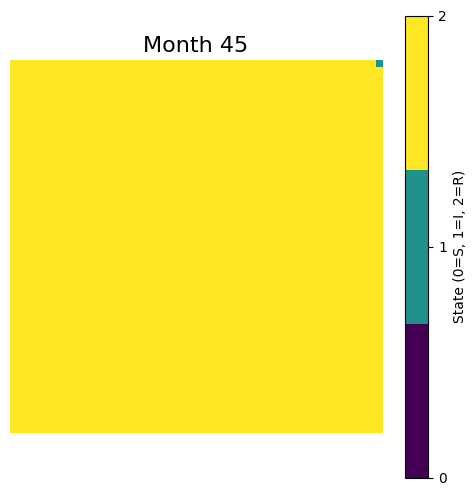

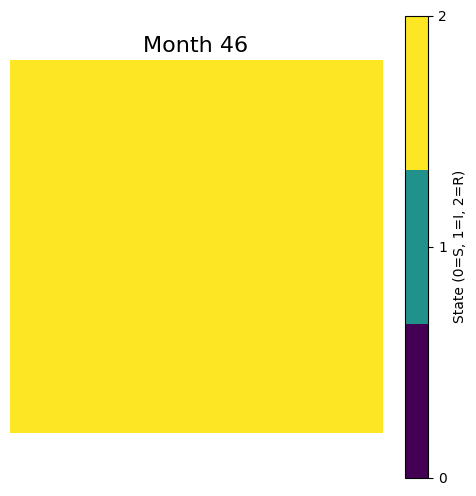

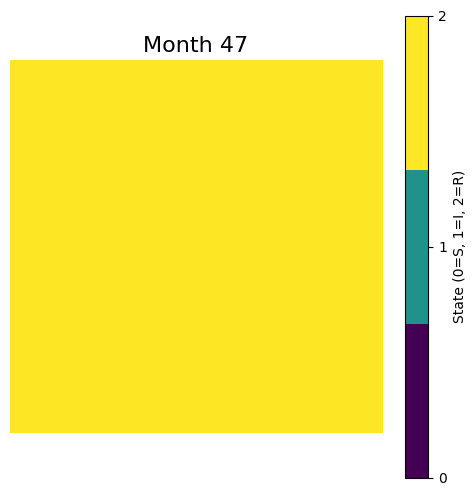

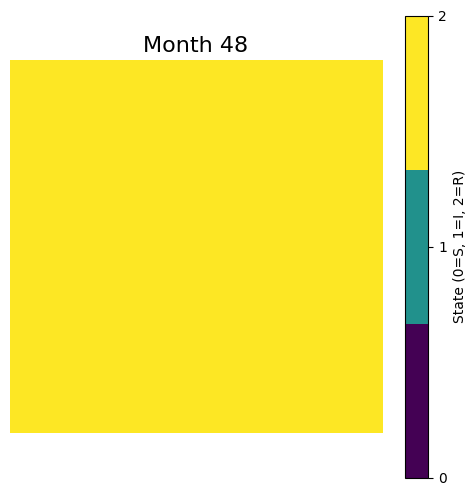

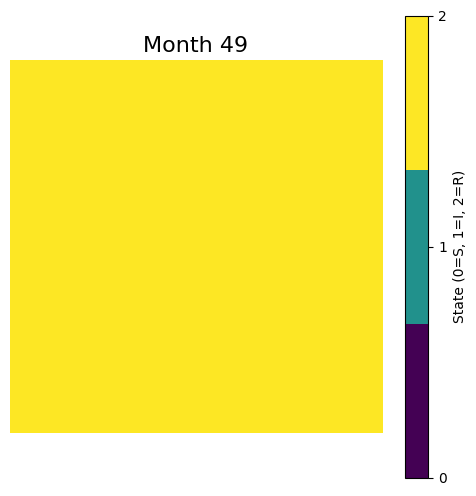

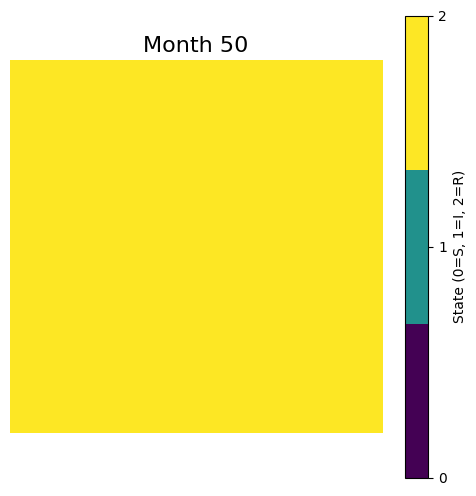

In [29]:
s_history, i_history, r_history = [], [], []

for t in range(1, num_steps + 1):
    s_count = np.count_nonzero(grid == S)
    i_count = np.count_nonzero(grid == I)
    r_count = np.count_nonzero(grid == R)
    s_history.append(s_count)
    i_history.append(i_count)
    r_history.append(r_count)

    visualize(grid, t)

    grid, infection_timer = step(grid, infection_timer)

##Plot Time Series
Here, I plot the data collected from the simulation loop. This gives me an epidemic curve showing how the number of susceptible, infected, and recovered individuals changes over time.

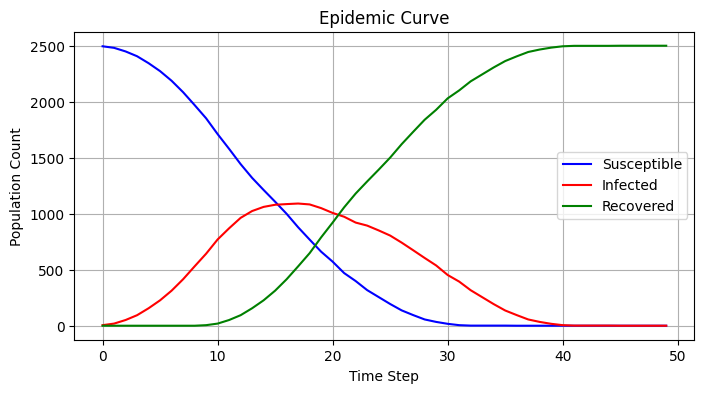

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(s_history, label="Susceptible", color="blue")
plt.plot(i_history, label="Infected", color="red")
plt.plot(r_history, label="Recovered", color="green")
plt.title("Epidemic Curve")
plt.xlabel("Time Step")
plt.ylabel("Population Count")
plt.legend()
plt.grid(True)
plt.show()

##Analysis
In this section, I analyze the simulation results. I explain the trends seen in the graph and discuss how changing infection probability or recovery time would affect the outcome.

###Analysis:
- The infection curve (red) rises quickly and then falls as people recover.
- As more individuals become recovered (green), susceptible (blue) decreases.
- We observe herd immunity effects as the infection dies out due to lack of susceptible individuals.


#Conclusion
To conclude, I reflect on what this model shows and how it could be extended.
This basic simulation already reveals important epidemic dynamics, and with more features like movement, vaccination, or death rates, it could provide deeper insights into real-world scenarios.